<a href="https://colab.research.google.com/github/guddlaraji/files/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read the csv file
df = pd.read_csv("/content/student_scores.csv")

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#check the null values
df.isnull().sum()

,0
Hours,0
Scores,0


In [ ]:
#check duplicate data
df.duplicated().sum()

np.int64(0)

In [ ]:
# drop the duplicates
df.drop_duplicates()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.dtypes

,0
Hours,float64
Scores,int64


In [ ]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Visualize the Data**

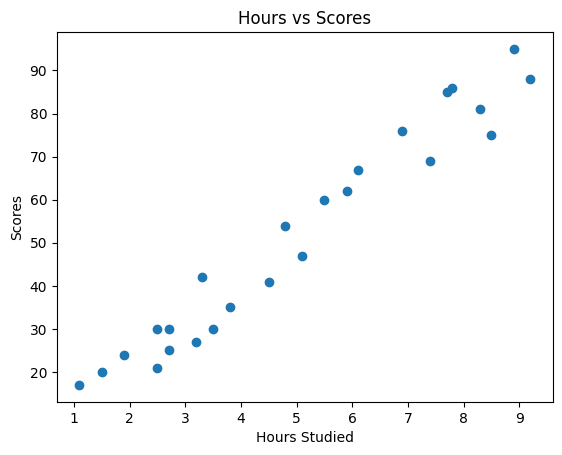

In [ ]:
plt.scatter(df["Hours"], df["Scores"])
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

**Split Data Into Train & Test**

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Hours']]   # Feature (2D)
y = df['Scores']    # Target (1D)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


**Build & Train the Model**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Slope (m):", model.coef_)
print("Intercept (c):", model.intercept_)

Slope (m): [9.68207815]
Intercept (c): 2.826892353899737


**Predict & Evaluate**

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

result = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(result)

print("\nModel Accuracy (R2 Score):", r2_score(y_test, y_pred))


    Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153

Model Accuracy (R2 Score): 0.9678055545167994


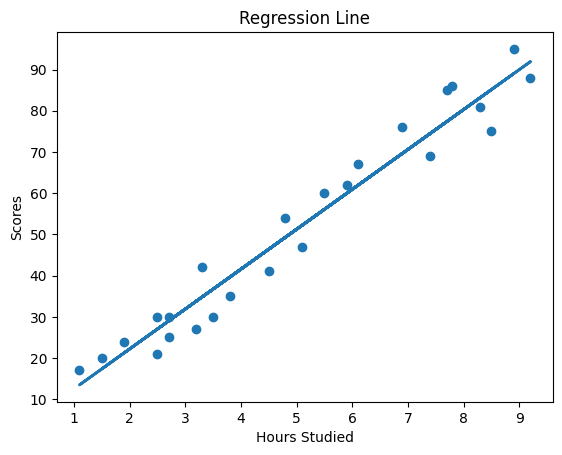

In [ ]:
plt.scatter(df["Hours"], df["Scores"])
plt.plot(df["Hours"], model.predict(df[['Hours']]), linewidth=2)
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Regression Line")
plt.show()